In [1]:
import numpy as np
import roboticstoolbox as rtb
from roboticstoolbox import *
from spatialmath import *
from math import pi
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import cm
import random
import RobotUtils

In [2]:
MAX_a = 10
MAX_d = 10
MAX_alpha = np.pi*2
MAX_theta = np.pi*2

Este programa constrói a lógica do Algoritmo Genético que constrói o Robô, o AG1.
O cromossomo segue a estrutura descrita na imagem abaixo.
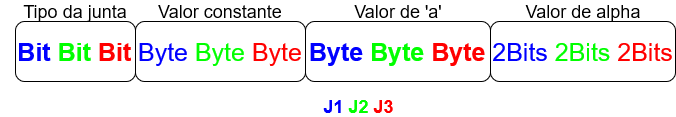

O cromossomo é inteiramente binário. Os 3 primeiros bits são referentes aos tipos das 3 juntas, sendo '1' equivalente a junta de rotação e '0' a junta prismática.
Cada um dos 3 bytes seguintes é referente ao valor constante de cada uma das juntas, sendo esse valor theta, caso a junta seja prismática, e d, caso seja uma junta de rotação. O valor desses parâmetros é discretizado em 256 estados possíveis, assim como os valores de 'a', que são determinados pelos 3 bytes seguintes.
Em seguida, restam 6 bits, sendo cada par de bit destinado para o valor de alpha. Os valores de aplha estão discretizados para múltiplos de pi/2, ou seja, apenas 4 valores.

In [3]:
robot_build_funcs = {'RRR': RobotUtils.robo_RRR,
                    'RRP' : RobotUtils.robo_RRP,
                    'RPR' : RobotUtils.robo_RPR,
                    'RPP' : RobotUtils.robo_RPP,
                    'PRR' : RobotUtils.robo_PRR,
                    'PRP' : RobotUtils.robo_PRP,
                    'PPR' : RobotUtils.robo_PPR,
                    'PPP' : RobotUtils.robo_PPP}

In [4]:
def birth_robot(cromossomo):
#     for i in range(2, 57, 8):
    const_list = [sum([(2**j) if cromossomo[j+i] else 0 for j in range(8)]) for i in range(3, 27, 8)]
    a_list = [sum([(2**j) if cromossomo[j+i] else 0 for j in range(8)]) for i in range(27, 51, 8)]
    juntas = cromossomo[:3]
    alpha_list = [sum([(2**j) if cromossomo[j+i] else 0 for j in range(2)]) for i in range(51, 57, 2)]
    for i in range(3):
        const_list[i] = const_list[i]*MAX_d/255.0 if juntas[i] else const_list[i]*MAX_theta/255.0
        
        alpha_list[i] = alpha_list[i]*MAX_alpha/4.0
        a_list[i] = a_list[i]*MAX_a/255.0
    
    strRobot = ''
    for i in cromossomo[:3]:
        strRobot += 'R' if i else 'P'
    robo = robot_build_funcs[strRobot]('',const_list,a_list,alpha_list)
    return robo
        

In [9]:
import sys
import time
t1 = time.time()
example_cr = np.random.randint(2, size=(57,), dtype=bool)
robo = birth_robot(example_cr)
t2 = time.time()
print(t2-t1)
print(robo)

0.0025267601013183594
DHRobot: , 3 joints (PRP), dynamics, standard DH parameters
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓
┃        θⱼ          ┃  dⱼ   ┃  aⱼ   ┃   ⍺ⱼ   ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━╋━━━━━━━╋━━━━━━━━┫
┃234.35294117647058° ┃    q1 ┃ 2.627 ┃ 180.0° ┃
┃ q2                 ┃ 6.471 ┃ 5.765 ┃ 180.0° ┃
┃194.82352941176472° ┃    q3 ┃ 4.157 ┃  90.0° ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━┻━━━━━━━┻━━━━━━━━┛



In [10]:
a = np.array([d for d in range(57)])
for i in range(3):
    print(a[i])
for i in range(3,27,8):
    print(a[i:i+8])
for i in range(27,51,8):
    print(a[i:i+8])
for i in range(51,57,2):
    print(a[i:i+2])
print(np.random.rand())

0
1
2
[ 3  4  5  6  7  8  9 10]
[11 12 13 14 15 16 17 18]
[19 20 21 22 23 24 25 26]
[27 28 29 30 31 32 33 34]
[35 36 37 38 39 40 41 42]
[43 44 45 46 47 48 49 50]
[51 52]
[53 54]
[55 56]
0.35507340011682187


In [11]:
robot = DHRobot(
      [
        PrismaticDH(a=0,alpha=0,theta=0,offset=0),
        PrismaticDH(a=0,alpha=0,theta=0,offset=0),
        PrismaticDH(a=0,alpha=0,theta=0,offset=0),
       ], name='')